# The Sparks Foundation - Data Science & Business Analytics Internship
## Task - 1 Predict the percentage of a student based on the no. of study hours
## Author - Atharva Shelke
### Batch - January 2022

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

#### Reading the Data

In [2]:
dataset = "http://bit.ly/w-data"
dt = pd.read_csv(dataset)
dt

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Understanding the Data

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking NULL Values 

In [5]:
dt.isnull().any()

Hours     False
Scores    False
dtype: bool

#### Ensuring Unique Values

In [6]:
dt.nunique()

Hours     23
Scores    23
dtype: int64

#### Plotting the distribution of scores

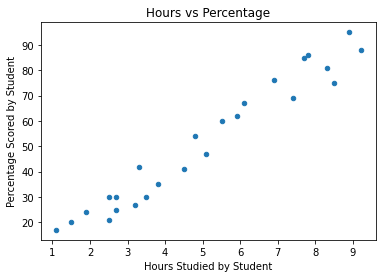

In [7]:
dt.plot.scatter(x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied by Student')  
plt.ylabel('Percentage Scored by Student')  
plt.show()

#### Preparing the Data

In [8]:
x = dt.iloc[:, :-1].values  
y = dt.iloc[:, 1].values 

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

#### Training the Linear Regression Algorithm

In [10]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

####  Analysing values of coefficient & intercept

In [11]:
lr.coef_

array([9.91065648])

In [12]:
lr.intercept_

2.018160041434683

#### Plotting the regression line

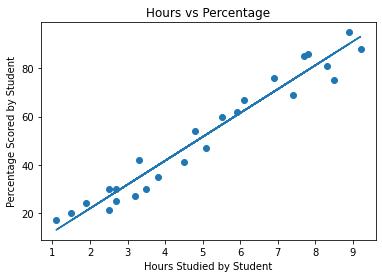

In [13]:
line = lr.coef_*x+lr.intercept_
plt.scatter(x , y)
plt.title('Hours vs Percentage')
plt.plot(x,line);
plt.xlabel('Hours Studied by Student')  
plt.ylabel('Percentage Scored by Student')
plt.show()

#### Testing the Prediction

In [14]:
print(x_test) # Testing data in Hours
y_pred = lr.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual Values vs Predicted Values

In [15]:
avp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
avp 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predicting score if a student studies 9.25 hrs/day

In [16]:
hours = np.array(9.25).reshape(1,1)
score = lr.predict(hours)
print("Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(score))

Hours Studied = [[9.25]]
Predicted Score = [93.69173249]


#### Checking the accuracy of model using SCORE() method

In [17]:
accuracy=lr.score(x_test,y_test)
print("The accuracy of the Linear Regression Model created above is: ",accuracy)

The accuracy of the Linear Regression Model created above is:  0.9454906892105356


#### Evaluating the Model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [19]:
from sklearn.metrics import mean_squared_error
print(' Mean Squared Error :',mean_squared_error(y_test, y_pred))

 Mean Squared Error : 21.5987693072174


In [20]:
from sklearn.metrics import r2_score
print(' R-Squared :',metrics.r2_score(y_test, y_pred))

 R-Squared : 0.9454906892105356
